### Chapter 07 검증하고 예측하기
#### 07-1 통계적으로 추론하기
--- 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
ns_book7 = pd.read_csv('data/ns_book7.csv', low_memory = False)
print(ns_book7.shape)
ns_book7.head()

(376129, 13)


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0.0,2021-03-19


--- 
#### - 중심극한 정리 확인 : 모집단과 랜덤샘플링한 데이터의 분포 비교 
--- 

In [5]:
## 랜덤하게 30개씩 샘플링한 평균을 1000개 만들기 
np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(30).mean()
    sample_means.append(m)
    
sample_means[:5]

[12.7, 15.333333333333334, 16.333333333333332, 9.2, 13.266666666666667]

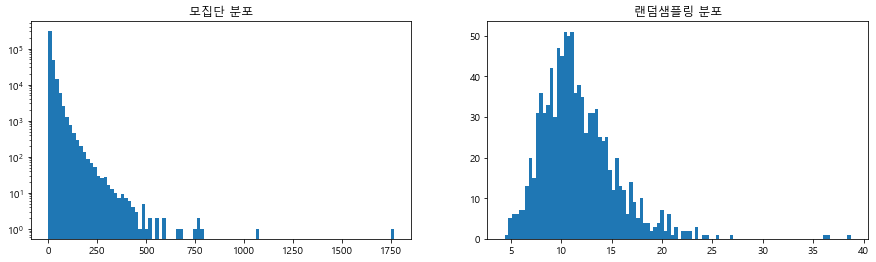

In [6]:
fig, axs = plt.subplots(1,2, figsize = (15,4))

axs[0].hist(ns_book7['대출건수'], bins = 100) 
axs[0].set_title('모집단 분포')
axs[0].set_yscale('log')

axs[1].hist(sample_means, bins=100)
axs[1].set_title('랜덤샘플링 분포')

fig.show()

--- 
#### - t-test 가설검정 : ttest_ind()
---

In [11]:
## 파이썬, C++, JavaScript 도서들의 대출건수는 차이가 있는가? 
## 참고 : 컴퓨터 관련 도서들의 주제분류번호는 모두 00 으로 시작한다. 

python_books_index = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('파이썬')
python_books = ns_book7[python_books_index] 

cplus_books_index = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('C++', regex = False)
cplus_books = ns_book7[cplus_books_index] 

java_books_index = ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('자바스크립트')
java_books = ns_book7[java_books_index] 

In [12]:
print('파이썬 =', len(python_books))
print('C++ =', len(cplus_books))
print('자바스크립트 =', len(java_books))

파이썬 = 251
C++ = 89
자바스크립트 = 105


In [16]:
## ttest_ind()는 t-score와 p-value를 반환 
from scipy import stats

t, pvalue = stats.ttest_ind(python_books['대출건수'], cplus_books['대출건수'])
print('-파이썬 vs C++ : 대출건수 평균 차이(t-score, p-value) = ', t, pvalue)

t, pvalue = stats.ttest_ind(python_books['대출건수'], java_books['대출건수'])
print('-파이썬 vs JavaScript : 대출건수 평균 차이(t-score, p-value) = ', t, pvalue)

-파이썬 vs C++ : 대출건수 평균 차이(t-score, p-value) =  2.1390005694958574 0.03315179520224784
-파이썬 vs JavaScript : 대출건수 평균 차이(t-score, p-value) =  -0.5523987093630017 0.5810238142528562


- t-test 결과 파이썬과 C++의 대출건수는 유의미한 차이가 존재하나, 파이썬과 자바스크립트 간에는 차이가 있다고 할수 없다. 
--- 
#### 07-2 머신러닝으로 예측하기 : 장서수가 많으면 대출건수도 많을까?
- training, test set 분리 
- LinearRegression 모델 훈련 및 검증 
- LogisticRegression 모델 훈련 및 검증 

In [26]:
from sklearn.model_selection import  train_test_split
train_set, test_set = train_test_split(ns_book7, test_size = 0.2, random_state = 42)
print(train_set.shape)
print(test_set.shape)

(300903, 13)
(75226, 13)


In [27]:
## input값은 2차원 배열이어야 함. 따라서 도서권수를 리스트로 감싼다. 
train_input = train_set[['도서권수']]
train_target = train_set['대출건수']
print(train_input.shape)
print(train_target.shape)

(300903, 1)
(300903,)


In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
lr.score(train_input, train_target)

0.10108060361854632

In [29]:
test_input = test_set[['도서권수']]
test_target = test_set['대출건수']
lr.score(test_input, test_target)

0.09946847025274175

- 결정계수(R square)가 10% 수준으로 별로 좋지 못하다. 

In [31]:
## 장서 수가 많으면 대출건수가 평균보다 높다? 
## LogisticRegression을 위해, target을 평균대비 높다/낮다의 불리언으로 변환 (False/True를 자동으로 0/1로 인식함)
borrow_mean = ns_book7['대출건수'].mean()
train_target_c = train_target > borrow_mean
test_target_c = test_target > borrow_mean

print(train_target_c[:5])
print(test_target_c[:5])

164654    False
291430     True
151777     True
317367    False
306802     True
Name: 대출건수, dtype: bool
304247    False
91369      True
310076     True
166819    False
20089     False
Name: 대출건수, dtype: bool


In [33]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(train_input, train_target_c)
logr.score(train_input, train_target_c)

0.7090989455073562

In [34]:
logr.score(test_input, test_target_c)

0.7085316247042246

--- 
### !참고 : DummyClassifier 
- 모델 훈련이 아닌 단순히 샘플에서 더 많은 값을 찍었을때의 성능을 나타냄 
- 앞서 LinearRegression이나 LogisticRegression의 성능이, 더미분류와 비슷하다면 모델링의 의미가 없다고 판단해야 할 것임 
---

In [36]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier()
dc.fit(train_input, train_target)
dc.score(train_input, train_target_c)

0.6925487615610346

In [37]:
dc.score(test_input, test_target_c)

0.6920213755882275

#### - 앞서 로지스틱 분류 정확도가 70% 였는데, 더미분류를 해도 69%로 거의 비슷함 --> 로지스틱 모형의 의미가 없다. 
#### - train/test_target_c의 구성을 살펴보면 대부분이 0(False)이기 때문에 이러한 결과 발생. 

In [38]:
train_target_c.value_counts()

False    208390
True      92513
Name: 대출건수, dtype: int64

In [39]:
test_target_c.value_counts()

False    52058
True     23168
Name: 대출건수, dtype: int64